In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

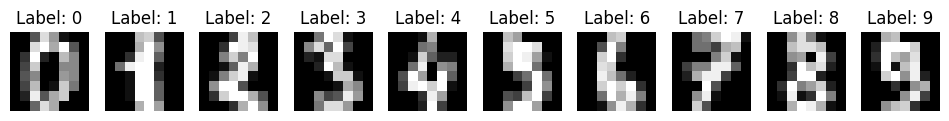

In [7]:
# Plot the first 10 images from the dataset
fig, axes = plt.subplots(1, 10, figsize=(12, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='grey')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 1078, Test samples: 719


In [10]:
reg = linear_model.LogisticRegression(max_iter=1000)
reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = reg.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2%}")

Test set accuracy: 95.27%


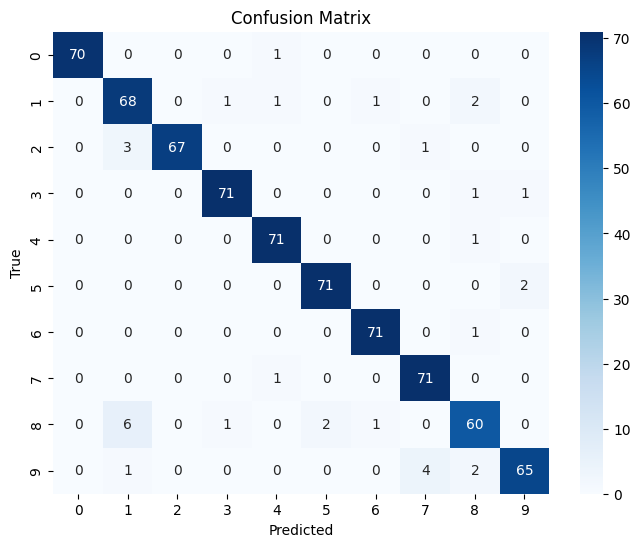

In [15]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = "d",cmap = "Blues",
            xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

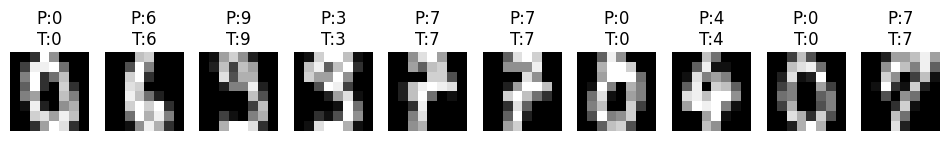

In [22]:
indices = np.random.choice(len(X_test), 10, replace=False)
fig, axis = plt.subplots(1,10,figsize = (12,2))
for i, idx in enumerate(indices):
    ax = axis[i]
    ax.imshow(X_test[idx].reshape(8,8),cmap="grey")
    ax.set_title(f"P:{y_pred[idx]}\nT:{y_test[idx]}")
    ax.axis('off')
plt.show()